# German credit risk

In [230]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import category_encoders as ce


In [231]:
data_file = "../csv/german_credit/german_credit_data.csv"
dataset = pd.read_csv(data_file, index_col=0)
ds = dataset.copy()
ds.head(15)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


## EDA

In [232]:
ds.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool

### Age

<AxesSubplot:>

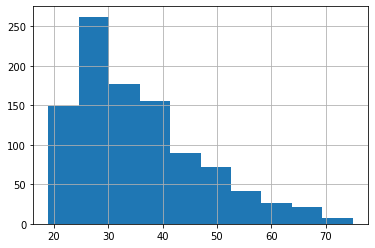

In [233]:
ds['Age'].hist()

### Sex

<AxesSubplot:>

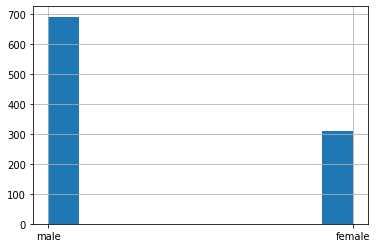

In [234]:
ds['Sex'].hist()

In [235]:
to_drop = []
decoded  = {}
decoded['Sex'] = {0: 'male', 1:'female'}
ds['Sex_num'] = ds['Sex'].apply(lambda x: 0 if x == 'male' else 1)
to_drop.append('Sex')

### Job

<AxesSubplot:>

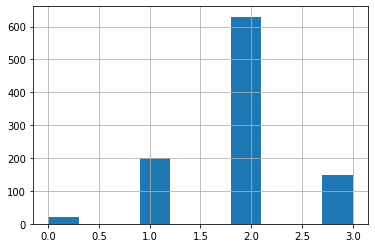

In [236]:
ds['Job'].hist()

### Housing

<AxesSubplot:>

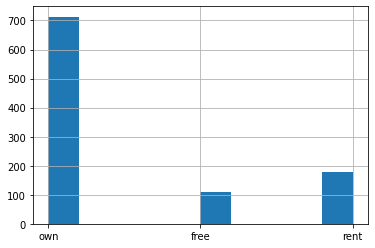

In [237]:
ds['Housing'].hist()

In [238]:
decoded['Housing'] = {0:'own', 1:'free', 2:'rent'}
ds['Housing_num'] = ds['Housing'].apply(lambda x: 0 if x == 'own' else 1 if x == 'free' else 2)
to_drop.append('Housing')

### Saving accounts

<AxesSubplot:>

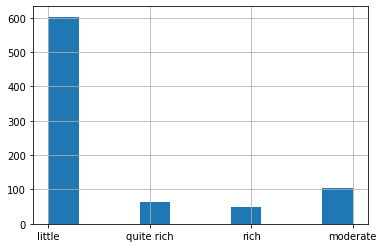

In [239]:
ds['Saving accounts'].hist()

In [240]:
ds['Saving accounts'].fillna('no', inplace=True)

<AxesSubplot:>

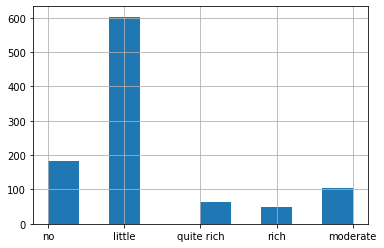

In [241]:
ds['Saving accounts'].hist()

In [242]:
decoded['Savings'] = {0:'no', 1: 'little', 2:"quite rich", 3: 'rich'}
savings = {'no': 0, 'little':1, 'moderate':2,  'quite rich': 3, 'rich': 4}
ds['Savings_num'] = ds['Saving accounts'].apply(savings.get)

<AxesSubplot:>

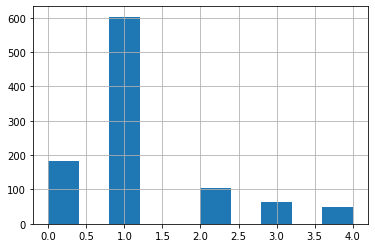

In [243]:
ds['Savings_num'].hist()

### Checking account

<AxesSubplot:>

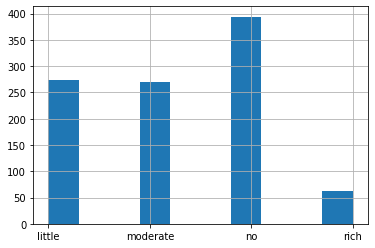

In [244]:
ds['Checking account'].fillna('no', inplace=True)
ds['Checking account'].hist()

In [245]:
checkings = {'no': 0, 'little':1, 'moderate':2, 'rich': 3}
ds['Checking_num'] = ds['Checking account'].apply(checkings.get)
decoded['Checkings'] = checkings

<AxesSubplot:>

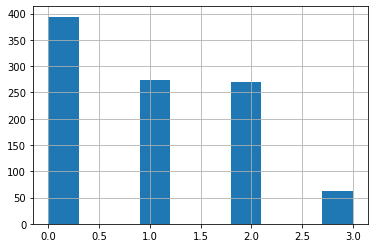

In [246]:
ds['Checking_num'].hist()

### Credit amount

<AxesSubplot:>

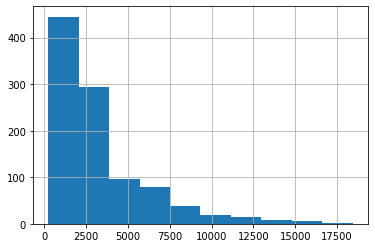

In [247]:
ds['Credit amount'].hist()

<AxesSubplot:>

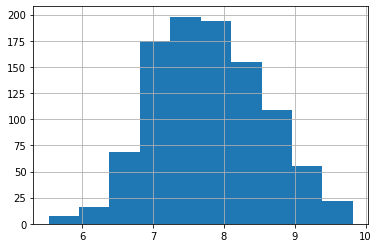

In [248]:
np.log(ds['Credit amount']).hist()

In [249]:
# ds['Credit_amount_log'] = np.log(ds['Credit amount'])
# to_drop.append('Credit amount')

### Прямо, идеальный пример логнормального распределения

### Duration

<AxesSubplot:>

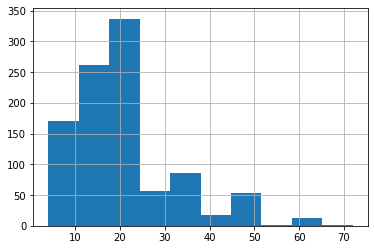

In [250]:
ds['Duration'].hist()

In [251]:
to_drop.extend(['Checking account', 'Saving accounts'])

### Purpose

<AxesSubplot:>

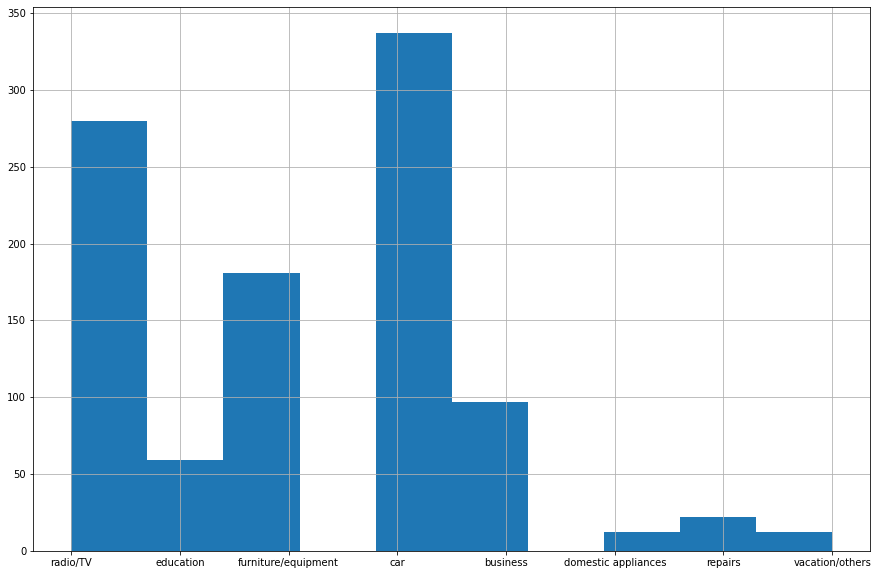

In [252]:
plt.figure(figsize=(15,10))
ds['Purpose'].hist()

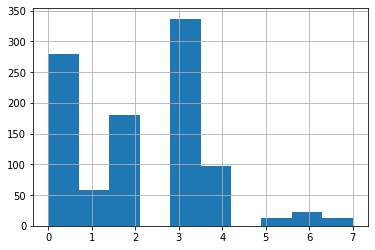

In [253]:
purpose = dict(zip(ds['Purpose'].unique(), range(len(ds['Purpose'].unique()))))
ds['Purpose_num'] = ds['Purpose'].apply(purpose.get)
ds['Purpose_num'].hist()
decoded['Purpose'] = purpose

In [254]:
to_drop

['Sex', 'Housing', 'Checking account', 'Saving accounts']

In [255]:
to_drop.append('Purpose')

In [256]:
ds.drop(columns=to_drop)

,Age,Job,Credit amount,Duration,Sex_num,Housing_num,Savings_num,Checking_num,Purpose_num
0,67,2,1169,6,0,0,0,1,0
1,22,2,5951,48,1,0,1,2,0
2,49,1,2096,12,0,0,1,0,1
3,45,2,7882,42,0,1,1,1,2
4,53,2,4870,24,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,1,0,2
996,40,3,3857,30,0,0,1,1,3
997,38,2,804,12,0,0,1,0,0
998,23,2,1845,45,0,1,1,1,0


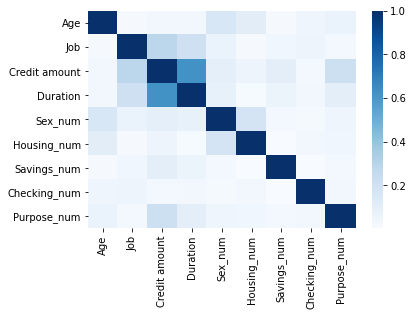

In [257]:
ax = sns.heatmap(ds.corr().abs(),cmap="Blues")

<Figure size 1080x1080 with 0 Axes>

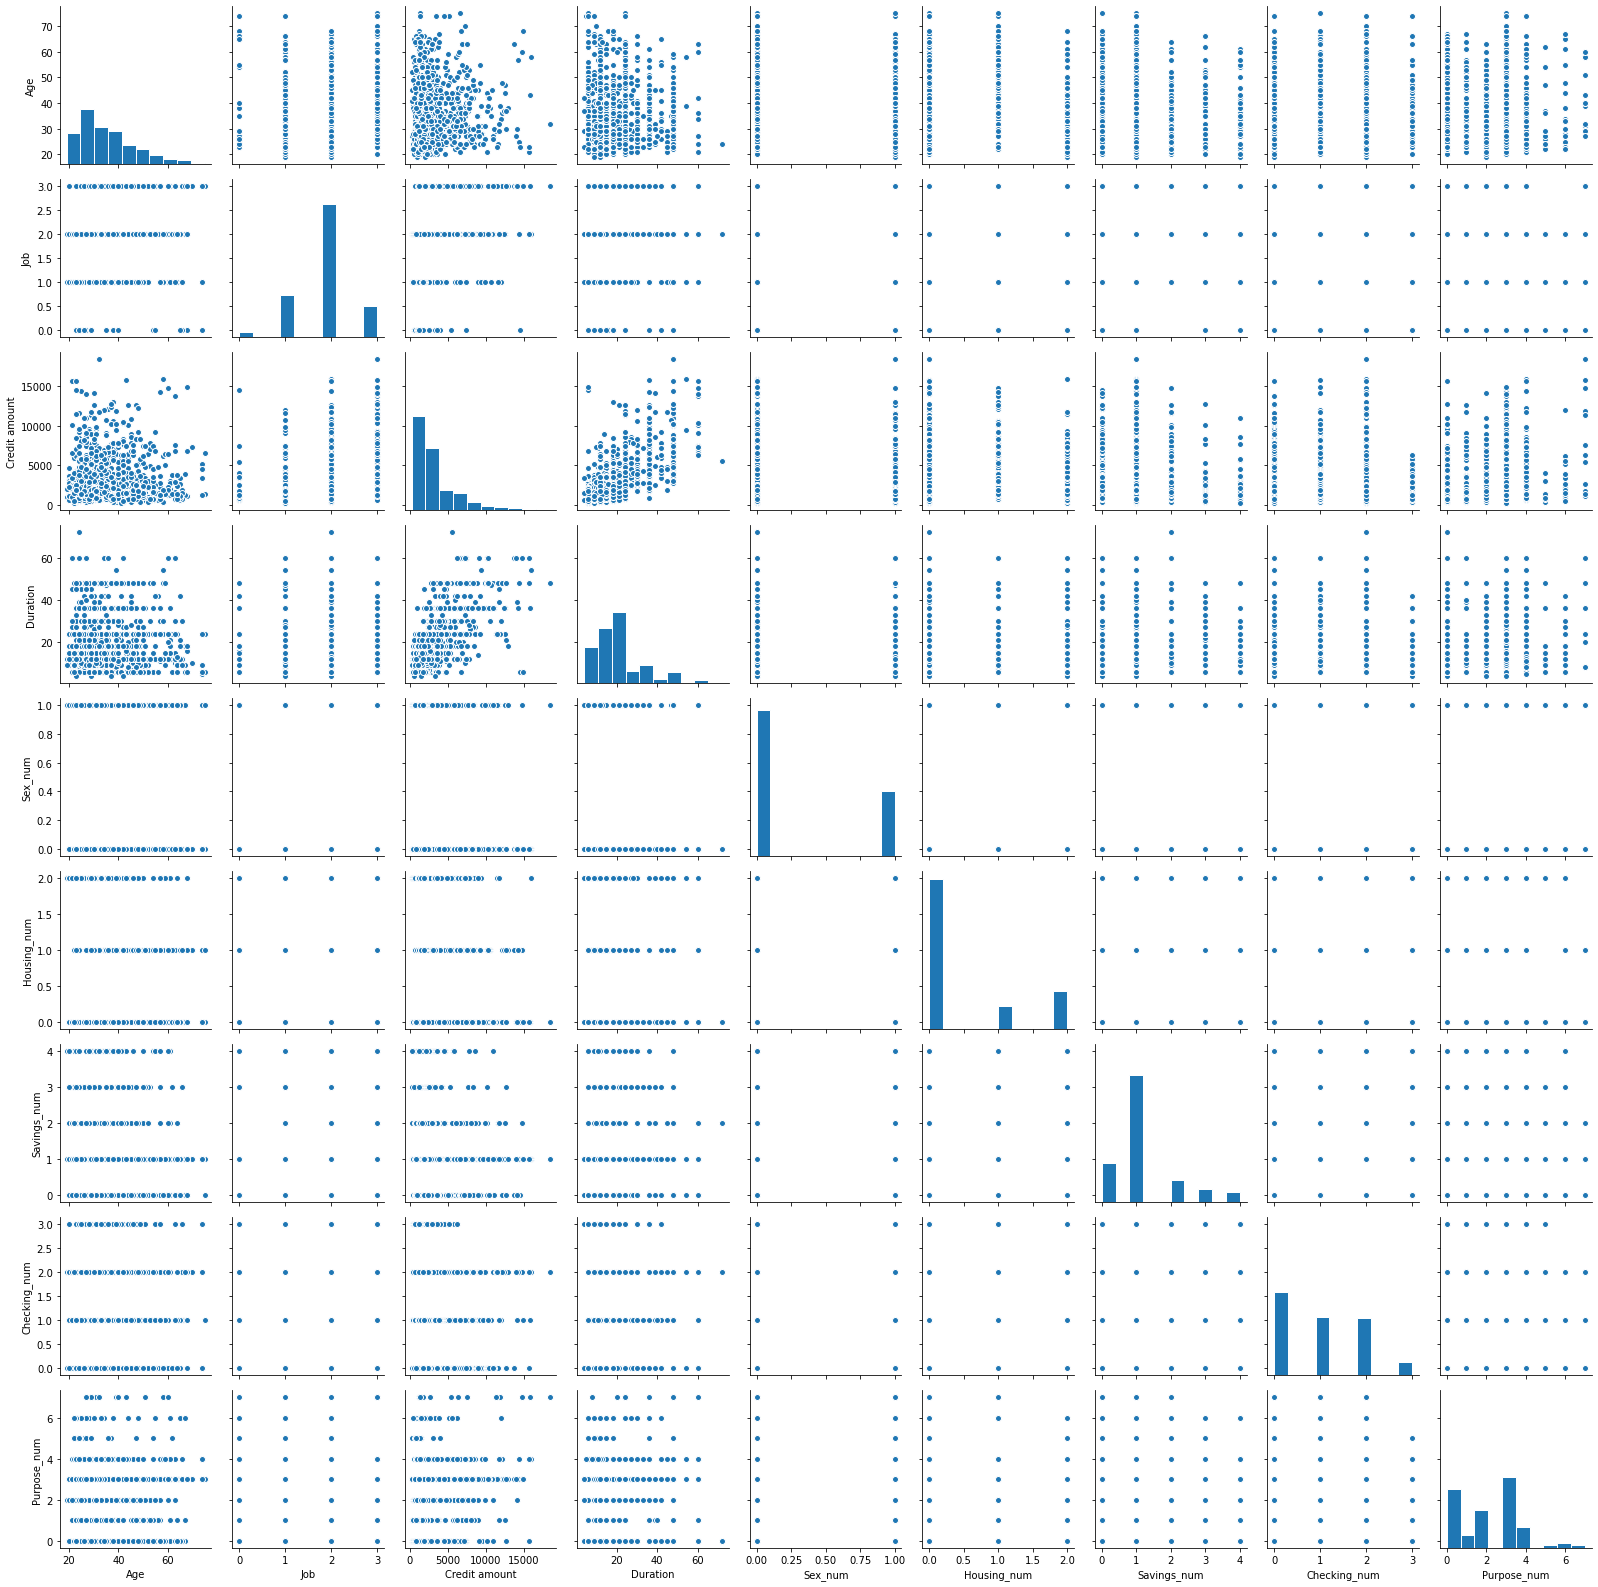

In [258]:
plt.figure(figsize=(15,15))
ax = sns.PairGrid(ds.drop(columns=to_drop), palette="Set2")
ax = ax.map_diag(plt.hist, edgecolor="w")
ax = ax.map_offdiag(plt.scatter, edgecolor="w")
plt.show()

In [259]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ds.drop(columns=to_drop))

<AxesSubplot:>

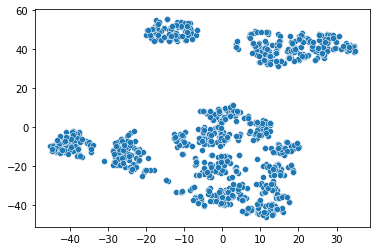

In [260]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1])

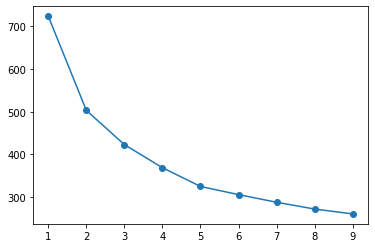

In [261]:
from sklearn.cluster import KMeans

inert = []

for i in range(1,10):
    inert.append(KMeans(i).fit(X_scaled).inertia_)

plt.plot(range(1,10), inert, marker='o')

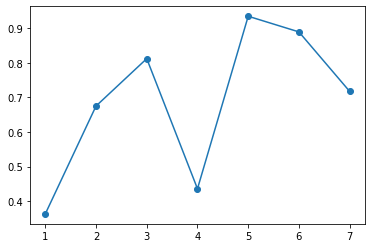

In [262]:
Di = []
for i in range(1,8):
    Di.append((inert[i] - inert[i+1]) / (inert[i -1] - inert[i]))
    
plt.plot(range(1,8), Di, marker='o')

In [263]:
ds['Cluster'] = KMeans(4).fit(X_scaled).labels_
ds['Cluster']

0      2
1      3
2      2
3      1
4      1
      ..
995    3
996    2
997    2
998    1
999    2
Name: Cluster, Length: 1000, dtype: int32

<AxesSubplot:>

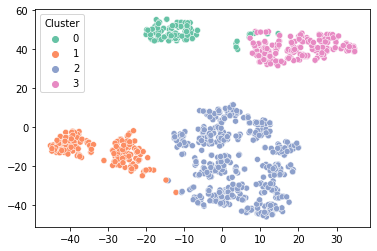

In [264]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")

<AxesSubplot:>

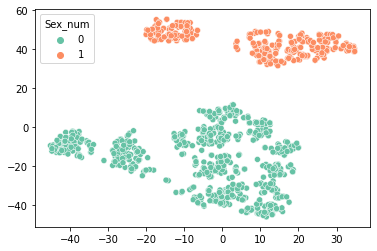

In [265]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Sex_num'], palette="Set2")

<AxesSubplot:>

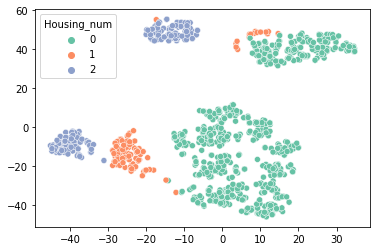

In [266]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Housing_num'], palette="Set2")

In [267]:
ds.groupby('Cluster').median().T

Cluster,0,1,2,3
Age,25,36,34,30
Job,2,2,2,2
Credit amount,2146,2964,2346,1842
Duration,18,21,18,15
Sex_num,1,0,0,1
Housing_num,2,1,0,0
Savings_num,1,1,1,1
Checking_num,1,1,1,1
Purpose_num,2,3,2,2


In [268]:
decoded

{'Sex': {0: 'male', 1: 'female'},
 'Housing': {0: 'own', 1: 'free', 2: 'rent'},
 'Savings': {0: 'no', 1: 'little', 2: 'quite rich', 3: 'rich'},
 'Checkings': {'no': 0, 'little': 1, 'moderate': 2, 'rich': 3},
 'Purpose': {'radio/TV': 0,
  'education': 1,
  'furniture/equipment': 2,
  'car': 3,
  'business': 4,
  'domestic appliances': 5,
  'repairs': 6,
  'vacation/others': 7}}

In [269]:
ds['Cluster'].value_counts(normalize=True).sort_index()

0    0.109
1    0.173
2    0.517
3    0.201
Name: Cluster, dtype: float64

<AxesSubplot:>

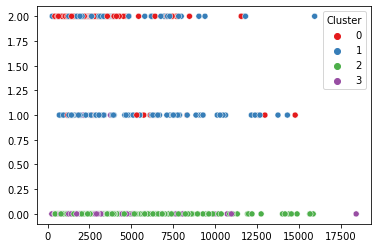

In [270]:
sns.scatterplot(ds['Credit amount'].values,ds['Housing_num'].values, hue=ds['Cluster'], palette="Set1")

<AxesSubplot:>

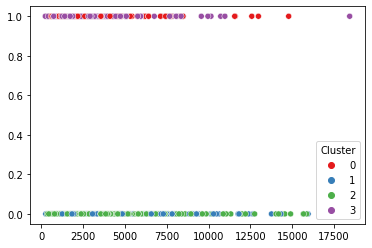

In [271]:
sns.scatterplot(ds['Credit amount'].values,ds['Sex_num'].values, hue=ds['Cluster'], palette="Set1")

### Сравним KMeans и EM

### KMeans

<AxesSubplot:>

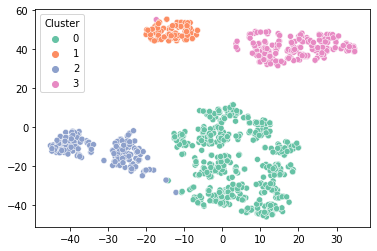

In [272]:
ds['Cluster'] = KMeans(4).fit(X_scaled).labels_
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")

In [273]:
ds.groupby('Cluster').median().T

Cluster,0,1,2,3
Age,34,24,36,31
Job,2,2,2,2
Credit amount,2346,2124,2964,1893
Duration,18,18,21,18
Sex_num,0,1,0,1
Housing_num,0,2,1,0
Savings_num,1,1,1,1
Checking_num,1,1,1,1
Purpose_num,2,2,3,2


### EM

<AxesSubplot:>

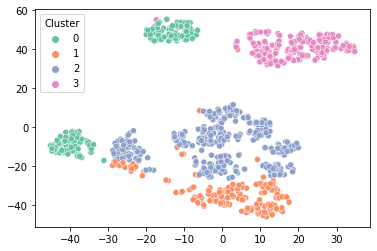

In [274]:
from sklearn.mixture import GaussianMixture

ds['Cluster'] = GaussianMixture(4, random_state=42).fit(X_scaled).predict(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")

In [275]:
ds.groupby('Cluster').median().T

Cluster,0,1,2,3
Age,26,34,36,31
Job,2,2,2,2
Credit amount,2301,2465,2452,1893
Duration,18,18,20,18
Sex_num,1,0,0,1
Housing_num,2,0,0,0
Savings_num,1,1,1,1
Checking_num,1,2,0,1
Purpose_num,2,3,2,2


In [276]:
ds['Cluster'].value_counts(normalize=True).sort_index()

0    0.179
1    0.204
2    0.402
3    0.215
Name: Cluster, dtype: float64

<AxesSubplot:>

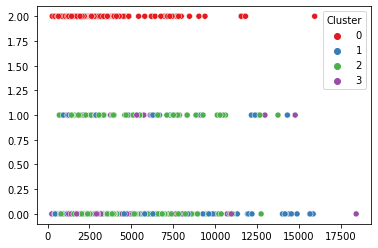

In [277]:
sns.scatterplot(ds['Credit amount'].values,ds['Housing_num'].values, hue=ds['Cluster'], palette="Set1")

<AxesSubplot:>

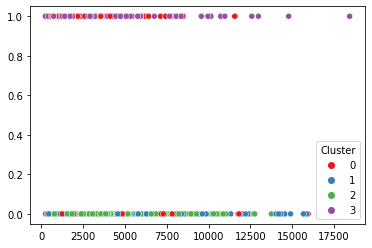

In [278]:
sns.scatterplot(ds['Credit amount'].values,ds['Sex_num'].values, hue=ds['Cluster'], palette="Set1")

### Agglomeartive and DBSCAN

In [279]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

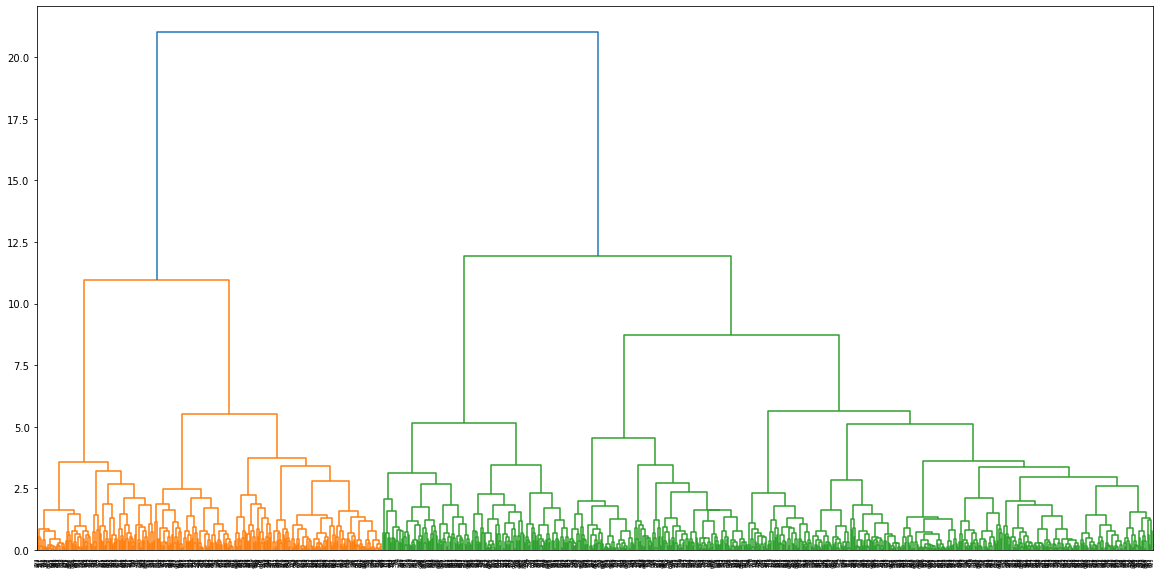

In [280]:
plt.figure(figsize=(20,10))
link = linkage(X_scaled, method='ward')
dend = dendrogram(linkage_)

<AxesSubplot:>

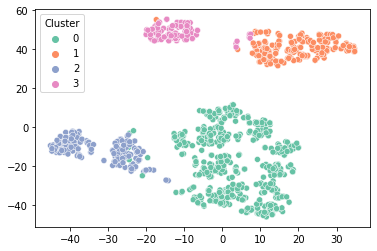

In [281]:
ds['Cluster'] = AgglomerativeClustering(n_clusters=4).fit(X_scaled).labels_
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")

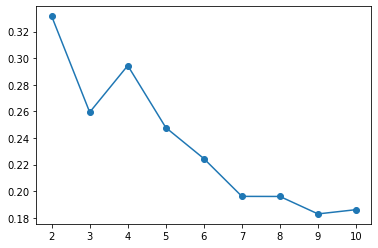

In [282]:
silhouette = []
for i in range(2,11):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, agg.labels_))
plt.plot(range(2,11), silhouette, marker='o');

<AxesSubplot:>

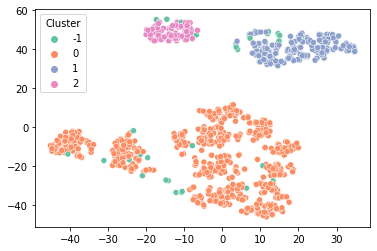

In [283]:
ds['Cluster'] = DBSCAN(eps=0.55).fit(X_scaled).labels_
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")

eps=0.5


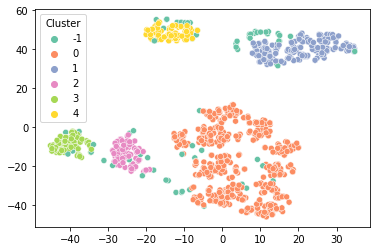

eps=0.51


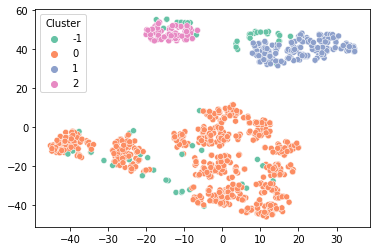

eps=0.52


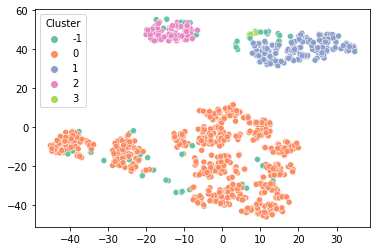

eps=0.53


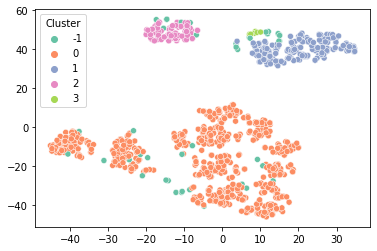

eps=0.54


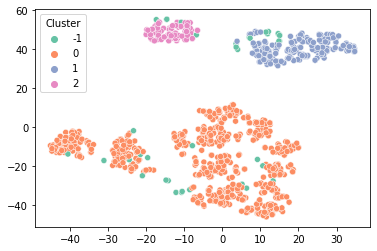

eps=0.55


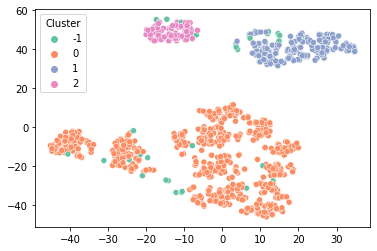

eps=0.56


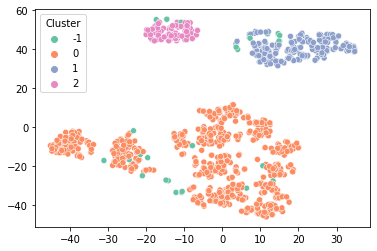

In [284]:
for i in np.arange(0.5, 0.57, 0.01):
    ds['Cluster'] = DBSCAN(eps=i).fit(X_scaled).labels_
    sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")
    print("eps={}".format(i))
    plt.show()

### Попробуем удалить признак пола из выборки как слишком очевидный

<AxesSubplot:>

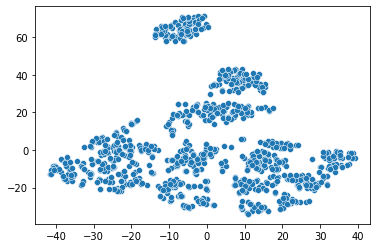

In [285]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ds.drop(columns=to_drop).drop(columns='Sex_num'))

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1])

eps=0.35


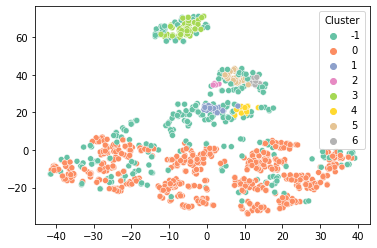

eps=0.39999999999999997


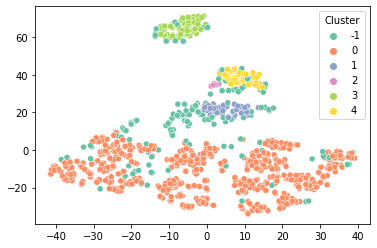

eps=0.44999999999999996


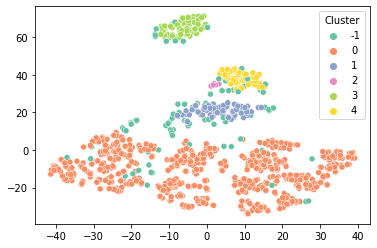

eps=0.49999999999999994


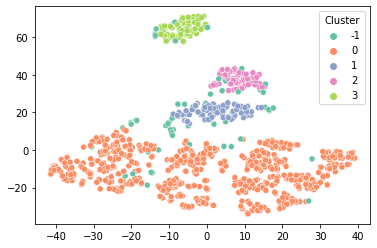

eps=0.5499999999999999


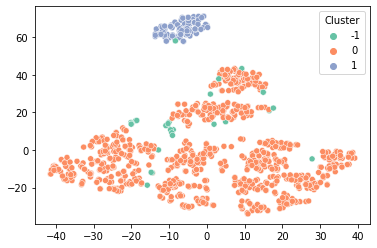

In [286]:
for i in np.arange(0.35, 0.6, 0.05):
    ds['Cluster'] = DBSCAN(eps=i).fit(X_scaled).labels_
    sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")
    print("eps={}".format(i))
    plt.show()

### Пожалуй,пол здесь самый важный признак. Без него каких-либо очевидный кластеров не выделяется

### Вернем его и попробуем визуализировать данные с помощью PCA

In [288]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ds.drop(columns=to_drop))

<AxesSubplot:>

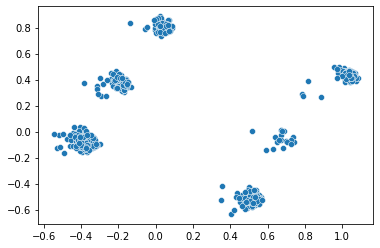

In [289]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(X_pca[:,0], X_pca[:,1])

<AxesSubplot:>

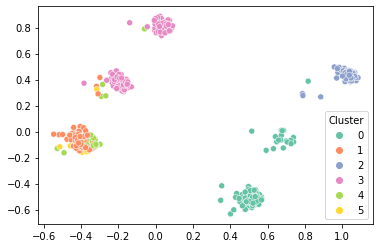

In [290]:
ds['Cluster'] = AgglomerativeClustering(n_clusters=6).fit(X_scaled).labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=ds['Cluster'], palette="Set2")

<AxesSubplot:>

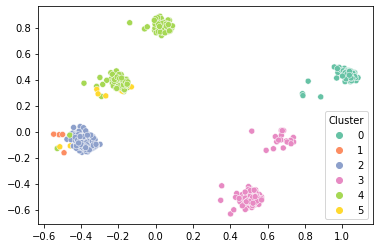

In [291]:
ds['Cluster'] = GaussianMixture(6, random_state=42).fit(X_scaled).predict(X_scaled)
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=ds['Cluster'], palette="Set2")

<AxesSubplot:>

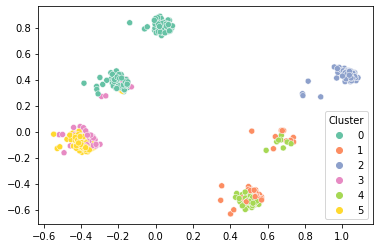

In [292]:
ds['Cluster'] = KMeans(6).fit(X_scaled).labels_
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=ds['Cluster'], palette="Set2")

<AxesSubplot:>

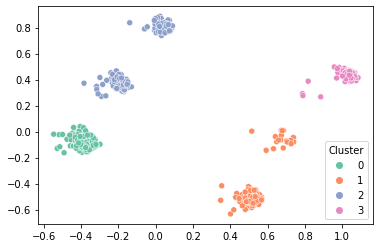

In [293]:
ds['Cluster'] = KMeans(4).fit(X_scaled).labels_
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=ds['Cluster'], palette="Set2")

### С первого взгляда кажется что данные можно разбить на 6 кластеров, но разные методы показывают похожий результат: 4 больших кластера, а остальные 2 слабо выделяются


### Остановимся на оптимальном числе кластеров равном 4м (На самом деле, еще лучше данные разделяются на два кластера по полу, но это слишком банально). Попробуем изучить эти кластеры более внимательно. По графикам видно что примерно одинаково разделяются кластеры с помощью KMeans и Agglomerative. Возьмем Agglomerative.

<AxesSubplot:>

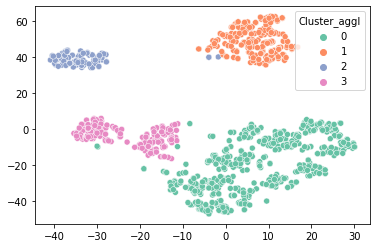

In [302]:
ds['Cluster_aggl'] = AgglomerativeClustering(n_clusters=4).fit(X_scaled).labels_
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster_aggl'], palette="Set2")

<AxesSubplot:>

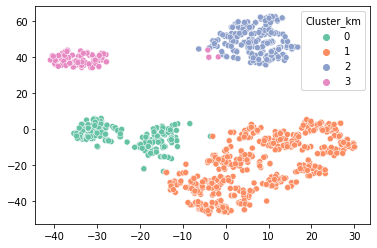

In [306]:
ds['Cluster_km'] = KMeans(n_clusters=4).fit(X_scaled).labels_
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster_km'], palette="Set2")

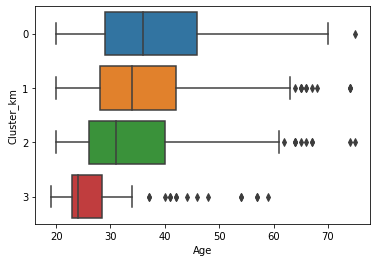

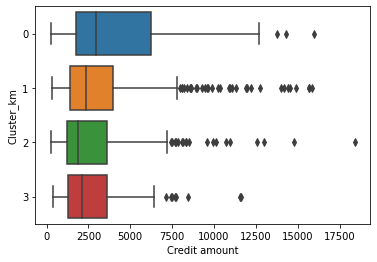

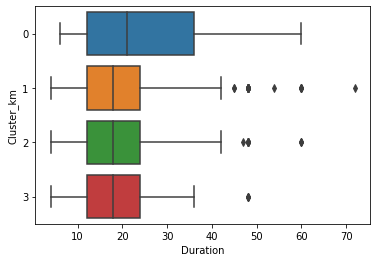

1: female, 0: male


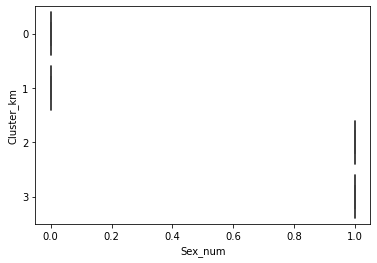

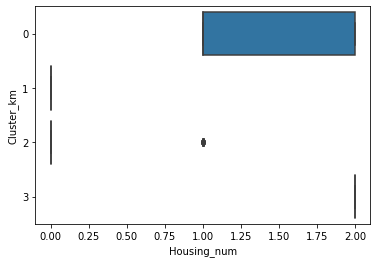

{'radio/TV': 0, 'education': 1, 'furniture/equipment': 2, 'car': 3, 'business': 4, 'domestic appliances': 5, 'repairs': 6, 'vacation/others': 7}


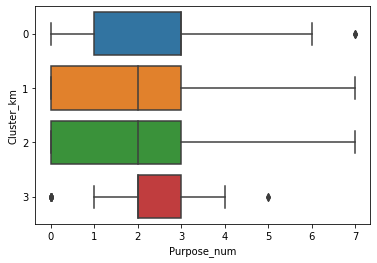

In [321]:
cols = ['Age', 'Credit amount', 'Duration', 'Sex_num', 'Housing_num',  'Purpose_num'] 
# остальные признаки не информативные
for col in cols:
    if col == "Sex_num":
        print("1: female, 0: male")
    if col == "Purpose_num":
        print(decoded['Purpose'])
    sns.boxplot(data=ds, x=col, y='Cluster_km', orient='h')
    plt.show();

#### Можно сказать что:
#### Первый кластер - мужчины, в возрасте от 30 до 40, со своим домом или арендуют.  Кредит берут на машину, с большим сроком кредитования но и большей суммой.
#### Второй к. - тоже мужчины, примерно тот же возраст, что и у первых (на 2-3 года моложе), без собственного дома.  Сумма кредита и продолжительность меньше. В основном кредит берут на furniture/equipment
#### Тертий к. - женщины, чуть моложе мужчин из второго кластера, а остальное почти такое же,  только сумма кредита чуть меньше.
#### Четвертый к. - женщины, примерно 24-25 лет, со своим домом, кредит берут на furniture/equipment или машину
#### Видимо, женщины в возрасте больше 30 лет и со своим домом в кредитах не нуждаются.